In [1]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

(array([2., 4., 3., 3., 8., 8., 4., 3., 7., 8.]),
 array([ 3.        ,  4.19999981,  5.4000001 ,  6.60000038,  7.80000019,
         9.        , 10.20000076, 11.40000057, 12.60000038, 13.80000019,
        15.        ]),
 <BarContainer object of 10 artists>)

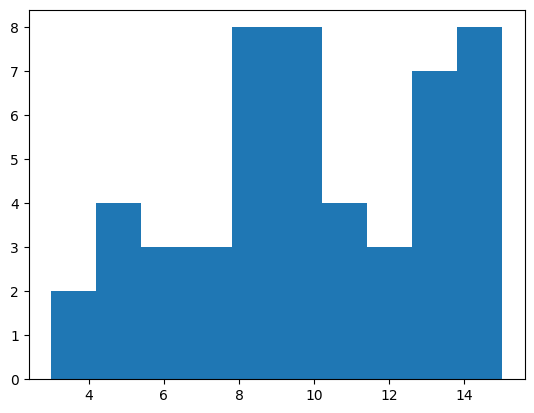

In [ ]:
# make λ a float tensor
rate = torch.tensor([10.0], dtype=torch.float32)  # or just torch.tensor([10.])
m = dist.Poisson(rate)

samples = m.sample((50,))        # 50 i.i.d. Poisson draws
samples             # torch.float32 (same dtype as rate)

plt.hist(samples,bins=10)

In [18]:
x = torch.arange(5)  # shape [5]
lmbda = torch.arange(5, dtype=torch.float32)  # shape [5]

# Reshape for broadcasting
x_grid = x.view(1, -1)        # shape [1, 5]
lambda_grid = lmbda.view(-1, 1)  # shape [5, 1]

# Distribution over grid of lambdas
m = dist.Poisson(rate=lambda_grid)  # shape [5, 1]

# Broadcasted log-prob over all (λ_i, x_j)
log_probs = m.log_prob(x_grid)  # shape [5, 5]
probs = log_probs.exp()

print("Probs:\n", probs)

Probs:
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
